# 0. 개요
- 부트캠프 과정 중 헷갈리는 내용을 정리하고자 작성한 notebook 입니다.
- 데이터의 경우, scikit-learn, kaggle에서 제공하는 데이터를 사용하였습니다.
- 실제 부트캠프에서 사용하는 대형 데이터와 달리 데이터 수가 적긴 합니다.

- 회귀모델에 대해서 간략하게 정리하고, 여유가 된다면 분류모델까지 할게용

# 1. 데이터 세팅
- 데이터 세팅은 우리가 모델 학습에 사용할 데이터를 불러오는 과정입니다.
- `pd.read_csv(filePath)`와 비슷한 역할을 수행합니다.
- 존재하는 데이터를 사용하려면, 아래 내용을 모두 <span style="color:red">주석 처리 혹은 삭제</span>하고, 우리가 배운대로 파일을 경로에서 불러오면 됩니다.

In [2]:
# 기초 라이브러리
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# 회귀모델 학습을 위한 랜덤 데이터 생성 과정
from sklearn.datasets import make_regression

X, Y = make_regression(
    n_samples=50_000, # 표본 데이터의 갯수 (데이터 수 100만개 생성)
    n_features=10, # 표본 데이터의 차원 (n차원 = n개의 열)
    bias=100, # y 절편
    noise=500, # 잔차의 standard error
    coef=False,
    random_state=42
    )

# X: 데이터 행렬
# Y: 타겟 변수 데이터 행렬 (항상 1차원 데이터)

# 데이터프레임 만들기
df1 = pd.DataFrame(X)
df1.columns = ['변수1', '변수2', '변수3', '변수4', '변수5',
              '변수6', '변수7', '변수8', '변수9', '변수10']

df1['Target'] = Y

# 상관없는 특성 제작
np.random.seed(42)
for col in ['변수1', '변수2', '변수3', '변수4', '변수5']:
    randList = []
    for _ in range(df1[col].shape[0]):
        randList.append(np.random.randint(0, 10000))
    df1[col] = randList

# 생성된 데이터프레임 확인
df1

,변수1,변수2,변수3,변수4,변수5,변수6,변수7,변수8,변수9,변수10,Target
0,7270,6042,6132,8623,4651,0.927003,-1.281700,0.002892,-1.151795,-0.534596,87.651341
1,860,8812,510,2476,8827,1.040512,-1.612853,0.163364,1.040172,0.709919,1138.607123
2,5390,8962,7861,667,6374,0.239267,-0.592554,1.316379,-0.598049,-0.476267,-11.231880
3,5191,6731,7798,7484,2481,0.124274,-0.826378,0.867338,-0.010170,-0.194522,171.513435
4,5734,4793,8674,4909,7663,0.169889,-0.770910,0.468739,0.726052,0.255569,321.568580
...,...,...,...,...,...,...,...,...,...,...,...
49995,916,9969,5245,7126,7590,-0.273612,1.151339,0.215497,0.308541,1.411091,424.041799
49996,8762,533,9782,2318,4738,-0.144753,0.944601,-0.656445,-1.210478,-0.438684,741.769210
49997,2094,8893,6357,8772,6923,0.286813,0.611715,1.486101,-0.031365,0.240950,594.162347
49998,6269,2302,8900,8542,3351,0.444013,-0.673551,-1.105671,-0.270772,0.944874,357.679957


In [4]:
# 기초통계량 확인
df1.describe()

,변수1,변수2,변수3,변수4,변수5,변수6,변수7,변수8,변수9,변수10,Target
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4988.011440,5017.452600,4991.275080,5031.211540,5005.18282,-0.000588,-0.006041,-0.002314,-0.004995,-0.002209,97.237841
std,2887.910142,2890.386995,2885.037701,2886.796019,2884.00047,0.996843,1.000066,1.002423,1.000610,1.003134,530.259835
min,0.000000,0.000000,0.000000,0.000000,0.00000,-4.157734,-3.719719,-4.829436,-4.164295,-4.295391,-2059.635706
25%,2483.750000,2518.750000,2501.000000,2530.000000,2510.00000,-0.678161,-0.683487,-0.679481,-0.680831,-0.678939,-260.097458
50%,4991.000000,5025.500000,4987.500000,5048.000000,5017.00000,-0.003113,-0.003456,-0.004295,-0.006940,-0.002264,96.933416
75%,7489.000000,7524.000000,7497.000000,7525.250000,7499.00000,0.667246,0.670979,0.672047,0.667642,0.668623,454.501914
max,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,4.005885,4.219366,3.918185,3.926238,3.859376,2301.002326


In [5]:
# 결측치 처리를 위한 결측치 생성하기.
import random
for _ in range(1000): # 1000개의 결측치 생성
    rand_x = random.randint(0, 50000)
    rand_y = random.randint(0, 10)
    df1.iloc[rand_x, rand_y] = np.nan

# 가급적이면 Y에는 결측치가 없도록...
df1['Target'] = Y
df1.isna().sum()

변수1        87
변수2        80
변수3       100
변수4        91
변수5       104
변수6       103
변수7        83
변수8        89
변수9        92
변수10       84
Target      0
dtype: int64

# 1. 데이터 전처리하기
- 학습에 사용할 데이터의 결측치를 확인하고, 결측치가 있다면 보강해야 합니다.
- 데이터 단위 통일을 위해 정규화를 진행합니다.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
# 설명변수와 목표변수 나누기
Y = df1['Target']
X = df1[[x for x in df1.columns if '변수' in x]]

In [8]:
# 데이터 전처리 파이프라인 만들기
pre_pipe = make_pipeline(
    KNNImputer(),       # 결측치 처리
    StandardScaler()    # 정규화
)

# 파이프라인 확인
pre_pipe

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('standardscaler', StandardScaler())])

In [9]:
# 데이터 나누어두기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.3)

# 2. 선형회귀모델
- 다중선형회귀모델
- 다항회귀분석
- 규제선형회귀분석
    - L1: Lasso
    - L2: Ridge
    - ElasticNet: Lasso & Ridge

## 2-1. 다중선형회귀모델

In [10]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

# 모델 선언
LinearRegression_pipe = make_pipeline(pre_pipe, LinearRegression())
LinearRegression_pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [11]:
# 모델 학습
LinearRegression_pipe.fit(x_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [12]:
# 평가 라이브러리 불러오기
from sklearn.metrics import r2_score, mean_squared_error

# 평가 함수 구성하기
def model_eval(model):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # 학습 성능
    r2_score_train = r2_score(y_train, y_train_pred)
    mse_score_train = mean_squared_error(y_train, y_train_pred)

    # 일반화 성능
    r2_score_test = r2_score(y_test, y_test_pred)
    mse_score_test = mean_squared_error(y_test, y_test_pred)

    print('학습 성능')
    print('R2 Score: ', r2_score_train)
    print('MSE Score: ', mse_score_train)
    
    print('일반화 성능')
    print('R2 Score: ', r2_score_test)
    print('MSE Score: ', mse_score_test)

    return {'r2_score_train':r2_score_train,
            'mse_train':mse_score_train,
            'r2_score_test':r2_score_test,
            'mse_test':mse_score_test}

In [13]:
# 모델 평가하기
model_eval(LinearRegression_pipe)

학습 성능
R2 Score:  0.06513090820462297
MSE Score:  261482.8792232484
일반화 성능
R2 Score:  0.07175575523385413
MSE Score:  264176.7035962733


{'r2_score_train': 0.06513090820462297,
 'mse_train': np.float64(261482.8792232484),
 'r2_score_test': 0.07175575523385413,
 'mse_test': np.float64(264176.7035962733)}

## 2-2. 다항회귀분석

In [14]:
# 다항회귀분석에는 PolynomialFeatures 모듈이 필요함.
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# 파이프라인 구성
PolynomialRegression_pipe = make_pipeline(pre_pipe,                     # 전처리된 데이터를 활용해
                                          PolynomialFeatures(degree=3), # 3차원의 다항회귀모델을 구성하여
                                          LinearRegression())           # 선형회귀분석 적용

In [16]:
# 모델 학습
PolynomialRegression_pipe.fit(x_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                 ('standardscaler', StandardScaler())])),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [17]:
# 모델 평가
model_eval(PolynomialRegression_pipe)

학습 성능
R2 Score:  0.07279108377042776
MSE Score:  259340.32816462315
일반화 성능
R2 Score:  0.06388669389090451
MSE Score:  266416.2248189457


{'r2_score_train': 0.07279108377042776,
 'mse_train': np.float64(259340.32816462315),
 'r2_score_test': 0.06388669389090451,
 'mse_test': np.float64(266416.2248189457)}

## 2-3. L1: Lasso 규제선형회귀모델
- Lasso는 일부 계수를 절대값에 비례하는 패널티(L1 norm)를 추가합니다.
- Feature Selection: Lasso는 일부 계수를 0 혹은 0에 가까운 수로 만들어 특정 변수를 선택하는데 유용합니다.
- 제한사항: 상관관계가 있는 변수 그룹이 있을 때, Lasso는 그 중 하나만 선택하는 경향이 있어 모든 관련 변수를 선택하지 않을 수 있습니다.

In [18]:
# lasso 모듈 불러오기
from sklearn.linear_model import Lasso

# 파이프라인 구성
Lasso_pipe = make_pipeline(pre_pipe, Lasso())

# 모델 학습
Lasso_pipe.fit(x_train, y_train)

# 모델 평가
model_eval(Lasso_pipe)

학습 성능
R2 Score:  0.0650969166329497
MSE Score:  261492.38666563627
일반화 성능
R2 Score:  0.07171462880932666
MSE Score:  264188.40810542984


{'r2_score_train': 0.0650969166329497,
 'mse_train': np.float64(261492.38666563627),
 'r2_score_test': 0.07171462880932666,
 'mse_test': np.float64(264188.40810542984)}

### L1: Lasso 하이퍼파라미터 설정
$$  \text{LASSO} = \text{MSE} + \text{penalty} = $$
$$ \frac{1}{n} \sum^n_{i=1}(y_i-\hat{y}_i)^2 + \alpha \sum^m_{j=1} \left\vert w_j \right\vert$$
- $\alpha$를 조정해야 한다.
    - $\alpha$를 낮게할수록(0에 가깝게 할수록) 규제항의 영향이 적어진다. 너무 작으면 모델의 복잡도가 증가(overfitting)한다.
    - $\alpha$를 높게할수록 규제항의 영향이 증가한다. 너무 크면 모델이 단순해진다(underfitting).

- ref: https://otugi.tistory.com/127

In [19]:
# 파라미터 최적화를 위한 CV 모듈 불러오기(CV는 향후 다루어보자.)
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

Lasso_hp = {'lasso__alpha':(0.1, 2.0)} # lasso의 alpha를 0.1부터 2.0까지 설정하며 탐색

# CV 적용
Lasso_pipe_tuned = BayesSearchCV(Lasso_pipe, Lasso_hp, cv=5, n_iter=20, n_jobs=-1, scoring='r2')

# 모델 학습
Lasso_pipe_tuned.fit(x_train, y_train)

# 최고 모델
Lasso_best = Lasso_pipe_tuned.best_estimator_

In [20]:
# 모델 확인
Lasso_best['lasso'] # alpha의 값이 약 0.1인 경우, 모델 성능이 가장 좋다.

Lasso(alpha=1.4642956178512416)

In [21]:
# 모델 평가
model_eval(Lasso_best)

학습 성능
R2 Score:  0.06506010269849505
MSE Score:  261502.68352287673
일반화 성능
R2 Score:  0.07167225360321927
MSE Score:  264200.4680156601


{'r2_score_train': 0.06506010269849505,
 'mse_train': np.float64(261502.68352287673),
 'r2_score_test': 0.07167225360321927,
 'mse_test': np.float64(264200.4680156601)}

In [22]:
# 주요 회귀 계수 확인을 위한 데이터프레임 구성
Lasso_df = pd.DataFrame()
Lasso_df['Coef'] = Lasso_best['lasso'].coef_
Lasso_df['Features'] = X.columns
Lasso_df

,Coef,Features
0,1.933333,변수1
1,0.000000,변수2
2,1.817298,변수3
3,-0.912158,변수4
4,0.003189,변수5
5,58.079995,변수6
6,44.997176,변수7
7,67.997083,변수8
8,82.993082,변수9
9,24.297063,변수10


In [23]:
px.bar(Lasso_df, x='Features', y='Coef')

## 2-4. L2: Ridge 규제선형회귀모델
- Ridge는 계수의 제곱에 비례하는 페널티(L2 norm)를 추가합니다.
- 특징 축소: Lasso와 달리, Ridge는 계수를 0으로 만들지 않고 0에 가깝게 축소시킵니다. 이는 모든 변수가 유용할 가능성이 있을 때 유리합니다.
- 다중공선성 처리: Ridge는 상관관계가 있는 변수들 간의 계수 값을 분배하여 다중공선성의 문제를 효과적으로 처리합니다.

In [24]:
# ridge 모듈 불러오기
from sklearn.linear_model import Ridge

# 파이프라인 구성
ridge_pipe = make_pipeline(pre_pipe, Ridge())

# 모델 학습
ridge_pipe.fit(x_train, y_train)

# 모델 평가
model_eval(ridge_pipe)

학습 성능
R2 Score:  0.06513090815060574
MSE Score:  261482.879238357
일반화 성능
R2 Score:  0.07175557289113776
MSE Score:  264176.7554906944


{'r2_score_train': 0.06513090815060574,
 'mse_train': np.float64(261482.879238357),
 'r2_score_test': 0.07175557289113776,
 'mse_test': np.float64(264176.7554906944)}

### L2: Ridge 하이퍼파라미터 설정
$$\text{Ridge} = \text{MSE} + \text{penalty} = 
\frac{1}{n} \sum^n_{i=1}(y_i-\hat{y}_i)^2 + \alpha \sum^m_{j=1} w_j^2$$
- $\alpha$를 조정해야 한다.
    - $\alpha$를 낮게할수록(0에 가깝게 할수록) 규제항의 영향이 적어진다. 너무 작으면 모델의 복잡도가 증가(overfitting)한다.
    - $\alpha$를 높게할수록 규제항의 영향이 증가한다. 너무 크면 모델이 단순해진다(underfitting).

In [25]:
# 모델 확인
ridge_pipe['ridge'] # alpha의 값이 약 0.1인 경우, 모델 성능이 가장 좋다.

Ridge()

In [26]:
# 파라미터 최적화를 위한 CV 모듈 불러오기(CV는 향후 다루어보자.)
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

ridge_hp = {'ridge__alpha':(0.1, 2.0)} # ridge의 alpha를 0.1부터 2.0까지 설정하며 탐색

# CV 적용
ridge_pipe_tuned = BayesSearchCV(ridge_pipe, ridge_hp, cv=5, n_iter=20, n_jobs=-1, scoring='r2')

# 모델 학습
ridge_pipe_tuned.fit(x_train, y_train)

# 최고 모델
ridge_best = ridge_pipe_tuned.best_estimator_

In [27]:
# 모델 확인
ridge_best['ridge'] # alpha의 값이 약 0.25인 경우, 모델 성능이 가장 좋다.

Ridge(alpha=1.9998283034645845)

In [28]:
# 모델 평가
model_eval(ridge_best)

학습 성능
R2 Score:  0.06513090798860344
MSE Score:  261482.87928366906
일반화 성능
R2 Score:  0.07175539048170765
MSE Score:  264176.8074041021


{'r2_score_train': 0.06513090798860344,
 'mse_train': np.float64(261482.87928366906),
 'r2_score_test': 0.07175539048170765,
 'mse_test': np.float64(264176.8074041021)}

In [29]:
# 주요 회귀 계수 확인을 위한 데이터프레임 구성
ridge_df = pd.DataFrame()
ridge_df['Coef'] = ridge_best['ridge'].coef_
ridge_df['Features'] = X.columns
ridge_df

,Coef,Features
0,3.397497,변수1
1,0.712729,변수2
2,3.282603,변수3
3,-2.359148,변수4
4,1.444061,변수5
5,59.560804,변수6
6,46.441821,변수7
7,69.462279,변수8
8,84.472474,변수9
9,25.768232,변수10


In [30]:
px.bar(ridge_df, x='Features', y='Coef')

## 2-5. ElasticNet 규제선형회귀모델
- ElasticNet은 L1과 L2의 페널티를 결합한 형태입니다.
- 장점: ElasticNet은 여러 상관관계가 있는 변수가 있을 때 유용하며, 그룹으로 변수를 선택할 수 있습니다.
- 유연성: 특징 선택(L1)과 특징 축소(L2)를 혼합하여 복잡한 데이터셋에 적합하며 높은 차원의 데이터에 대해 유연성을 제공합니다.

In [33]:
# ElasticNet 모듈 불러오기
from sklearn.linear_model import ElasticNet

# 파이프라인 구성
ElasticNet_pipe = make_pipeline(pre_pipe, ElasticNet())

# 모델 학습
ElasticNet_pipe.fit(x_train, y_train)

# 모델 평가
model_eval(ElasticNet_pipe)

학습 성능
R2 Score:  0.05757734346079013
MSE Score:  263595.61123562406
일반화 성능
R2 Score:  0.06204028717213095
MSE Score:  266941.70897165005


{'r2_score_train': 0.05757734346079013,
 'mse_train': np.float64(263595.61123562406),
 'r2_score_test': 0.06204028717213095,
 'mse_test': np.float64(266941.70897165005)}

### ElasticNet 하이퍼파라미터 설정

- `alpha`$\alpha$: 전체 규제의 강도를 조절합니다. 값이 클수록 규제의 강도가 강해지고 값이 작을수록 규제가 약해집니다.
    - 기본적으로 $\alpha$는 L1과 L2 규제의 합에 가중치를 부여합니다.
- `l1_ratio`: 이 파라미터는 L1 규제와 L2 규제 간의 비율을 조절합니다.
    - `l1_ratio = 0`이면 순수한 Ridge 회귀(L2 규제)로,
    - `l1_ratio = 1`이면 순수한 Lasso 회귀(L1 규제)로,
    - `0 < l1_ratio < 1`이면 L1과 L2를 혼합하여 사용합니다.

In [34]:
# 파라미터 최적화를 위한 CV 모듈 불러오기(CV는 향후 다루어보자.)
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

ElasticNet_hp = {'elasticnet__alpha':(0.1, 2.0), # ElasticNet의 alpha를 0.1부터 2.0까지 설정하며 탐색
                 'elasticnet__l1_ratio':(0,1)} # ElasticNet의 L2 및 L1 규제 비율 탐색

# CV 적용
ElasticNet_pipe_tuned = BayesSearchCV(ElasticNet_pipe, ElasticNet_hp, cv=5, n_iter=20, n_jobs=-1, scoring='r2')

# 모델 학습
ElasticNet_pipe_tuned.fit(x_train, y_train)

# 최고 모델
ElasticNet_best = ElasticNet_pipe_tuned.best_estimator_

/opt/anaconda3/envs/hana/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.813e+09, tolerance: 7.870e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/hana/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+09, tolerance: 7.804e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implem

In [36]:
# 모델 확인
ElasticNet_best['elasticnet'] # alpha의 값이 약 1.5인 경우, l1만 사용한 경우가 모델 성능이 가장 좋다.

ElasticNet(alpha=1.547410721322221, l1_ratio=1)

In [37]:
# 모델 평가
model_eval(ElasticNet_best)

학습 성능
R2 Score:  0.06505288368897555
MSE Score:  261504.70267979492
일반화 성능
R2 Score:  0.07165787921528655
MSE Score:  264204.55894155777


{'r2_score_train': 0.06505288368897555,
 'mse_train': np.float64(261504.70267979492),
 'r2_score_test': 0.07165787921528655,
 'mse_test': np.float64(264204.55894155777)}

In [38]:
# 주요 회귀 계수 확인을 위한 데이터프레임 구성
ElasticNet_df = pd.DataFrame()
ElasticNet_df['Coef'] = ElasticNet_best['elasticnet'].coef_
ElasticNet_df['Features'] = X.columns
ElasticNet_df

,Coef,Features
0,1.850044,변수1
1,0.000000,변수2
2,1.734031,변수3
3,-0.829487,변수4
4,0.000000,변수5
5,57.995446,변수6
6,44.915238,변수7
7,67.913310,변수8
8,82.908684,변수9
9,24.213616,변수10


In [39]:
px.bar(ElasticNet_df, x='Features', y='Coef')

# 3. 선형분류모델
- 선형분류모델은 입력된 데이터를 기반으로 직선이나 평면을 사용하여 클래스를 분류하는 모델입니다.  
이러한 모델은 다양한 기계학습 문제에서 사용되며, 해석이 용이하고 계산의 효율성이 높습니다.

- 선형분류모델은 입력 특징의 선형 결합을 통해 클래스 간의 경계를 찾습니다. 이러한 경계는 입력 공간에서 데이터를 구분하는 초평면(hyperplane)으로 표현됩니다.  
선형분류모델의 예로는 로지스틱 회귀, 서포트 벡터 머신(SVM), 퍼셉트론, 선형 판별 분석(LDA) 등이 있습니다.
    - 입력공간(Input Space): 각 입력 데이터 X를 좌표처럼 표현한 공간입니다.
    - 결정경계(Decision Boundary): 데이터를 분류하는 기준이 되는 경계입니다. 일반적으로 선형 분류 모델에서는 이 경계가 직선 또는 평면으로 나타납니다.
    - 결정구역(Decision Region): 결정경계에 의해 나누어진 입력 공간의 영역입니다.
    - 초평면(hyperplane): D차원의 공간에서 D-1차원으로 나타나는 평면 또는 경계로, 데이터를 두 개의 클래스로 나누는 역할을 합니다.

## 3-1. 선형분류모델 최적화 방법
- 선형분류모델을 최적화하기 위해서는 결정경계를 찾는 과정이 필요합니다.  
이는 주어진 데이터를 올바른 클래스로 분류하도록 하는 가중치 $w$와 편향 $b$를 찾는 과정입니다. 
    1. 판별 함수 사용(Discriminant Function): 함수를 이용해 클래스 간의 경계를 찾습니다. 예를 들어, LDA는 클래스 간의 분산을 최대화하여 결정 경계를 설정합니다.
    2. 확률적 모델 사용(Probabilistic Model): 각 클래스에 속할 확률을 모델링하여 결정경계를 설정합니다. 로지스틱 회귀가 이에 해당하며, 입력 특징의 선형 결합을 통해 특정 클래스에 속할 확률을 예측합니다.

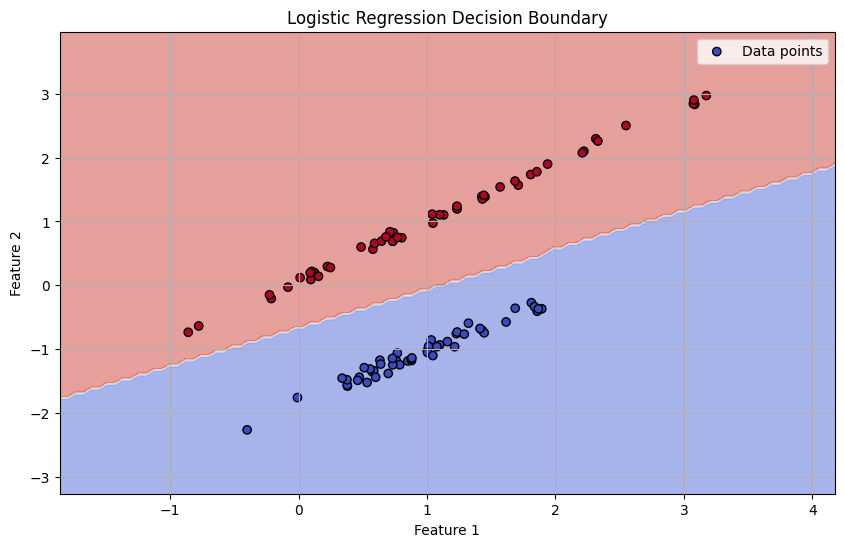

In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2. 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X, y)

# 3. 결정 경계 시각화
# 결정 경계를 그리기 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 결정 경계 예측
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. 결과 시각화
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm', label='Data points')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

### 3-1-a. 판별 함수
- 함수 정의: $$f(x)=w^T\cdot x+b$$
    - $w$: 가중치 벡터로 각 특징의 중요도를 나타냅니다.
    - $x$: 입력 데이터 벡터로, 예측하고자 하는 데이터 포인트를 나타냅니다.
    - $b$: 절편으로, 결정경계의 위치를 조정하는 역할을 합니다.
    - $w^T$: 가중치 벡터의 전치를 의미하며 벡터 내적을 통해 선형 결합을 수행합니다.
- 결정 경계:
    - 판별 함수가 0이 되는 지점($f(x)=0$)을 기준으로 클래스를 나눕니다.
    - 이 지점은 결정경계(hyperplane)을 형성하며 데이터가 이 경계를 기준으로 다른 클래스에 속하게 됩니다.
- 최적화 과정:
    - 최적의 결정경계를 찾기 위해 가중치 $w$와 절편 $b$를 조절합니다.
    - 이는 학습과정에서 손실함수를 최소화하거나 정확도를 최대화하는 방향으로 진행됩니다.

- 단점:
    1. 이상치에 민감함:
        - 판별함수는 이상치에 민감할 수 있습니다. 이상치는 모델이 학습하는 결정 경계를 왜곡시켜 예측 성능을 저하시킬 수 있습니다.
    2. 불균형 데이터 문제:
        - 데이터가 불균형한 경우, 판별 함수는 다수의 클래스에 편향된 결정을 내릴 수 있습니다.
    3. 비선형 데이터 처리의 한계:
        - 데이터가 선형적으로 구분되지 않는 경우, 단순한 선형 판별 함수로는 정확하게 분류할 수 없습니다.
        - 이러한 경우 비선형 변환이나 커널 기법 등을 사용하여 해결할 수 있습니다.

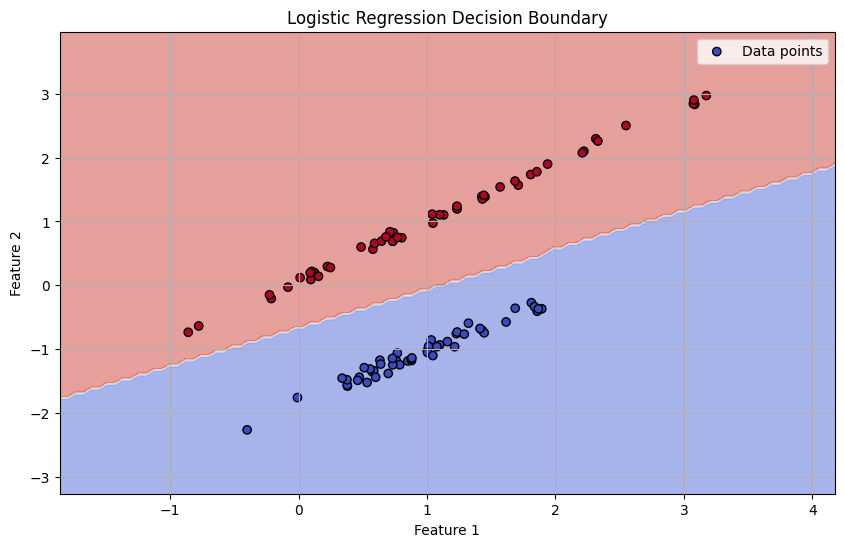

In [6]:
# 필요한 라이브러리 임포트
import numpy as np                # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 라이브러리
from sklearn.datasets import make_classification  # 데이터셋 생성을 위한 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델

# 1. 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
# 100개의 샘플과 2개의 특성을 가진 이진 분류용 데이터셋 생성

# 2. 로지스틱 회귀 모델 학습
model = LogisticRegression()  # 로지스틱 회귀 모델 객체 생성
model.fit(X, y)              # 모델을 학습 데이터(X, y)로 학습

# 3. 결정 경계 시각화
# 결정 경계를 그리기 위한 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # x축 범위 설정
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # y축 범위 설정
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# xx, yy는 각 점의 좌표를 생성하는 그리드입니다.

# 4. 결정 경계 예측
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드의 각 점에 대해 예측 수행
Z = Z.reshape(xx.shape)                            # 예측 결과를 그리드 형태로 변환

# 5. 결과 시각화
plt.figure(figsize=(10, 6))                       # 그래프 크기 설정
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm') # 결정 경계를 색으로 채움
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm', label='Data points')
# 원래 데이터 포인트를 표시, 각 포인트의 색상은 클래스에 따라 다르게 설정
plt.title('Logistic Regression Decision Boundary') # 그래프 제목
plt.xlabel('Feature 1')                            # x축 레이블
plt.ylabel('Feature 2')                            # y축 레이블
plt.legend()                                       # 범례 표시
plt.grid()                                         # 격자 표시
plt.show()                                         # 그래프 표시


# 4. 로지스틱 회귀

- 로지스틱 회귀는 확률적 모델을 사용하여 이진 분류 문제를 해결하는데 널리 사용되는 기법입니다. <br>
일반적인 회귀 분석이 연속형 수치를 예측하는 것과 달리, 로지스틱 회귀는 사건이 발생할 확률을 예측하고 이를 기반으로 분류를 수행합니다.

## 4-1. 로지스틱 회귀의 원리
### 4-1-a. Link Function Logit 함수 사용
- Link Function: 확률적 종속 변수 Y와 선형 조합의 독립 변수 X 간의 관계를 설정하는 함수입니다.<br>확률은 0에서 1 사이의 값을 가지지만, 선형 조합은 무한 범위를 가질 수 있습니다.<br>Link Function은 이러한 범위를 조정하여 선형 모델을 가능하게 합니다.
- Logit 함수: Logit 함수는 Odds의 로그 변환을 통해 확률 값을 실수 전체 범위로 변환하는 역할을 합니다.
    - Odds: 어떤 사건이 발생할 확률과 발생하지 않을 확률의 비율입니다. 범위는 0에서 무한대입니다.
    - Odds Ratio: 두 Odds를 비교한 값으로, 1에 가까울수록 두 사건의 발생 확률이 비슷함을 의미합니다.
    - 로그 변환: Odds에 로그를 씌워 선형성을 확보하고 해석을 용이하게 합니다.

### 4-2-b. 시그모이드 함수 사용
- 시그모이드 함수: 로짓 함수의 역함수로, 로그 Odds를 다시 확률 형태로 변환합니다. 이 함수는 입력값을 0에서 1 사이의 값으로 매핑하여 확률로 해석할 수 있게 합니다.
- 분류 기준: 시그모이드 함수의 출력값이 0.5를 기준으로 특정 클래스에 속하는지를 결정합니다. 예를 들어, 출력값이 0.5 이상이면 한 클래스로, 미만이면 다른 클래스로 분류합니다.

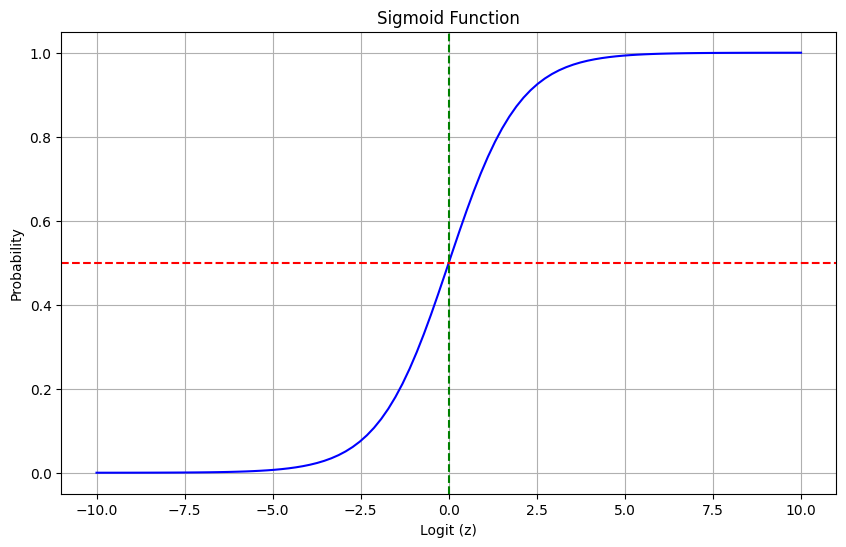

In [7]:
# 필요한 라이브러리 임포트
import numpy as np                # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 라이브러리

# 1. 시그모이드 함수 정의
def sigmoid(z):
    """
    시그모이드 함수 정의
    z: 입력값 (로짓)
    """
    return 1 / (1 + np.exp(-z))  # 시그모이드 함수 계산

# 2. 로짓 값 생성
z = np.linspace(-10, 10, 100)  # -10부터 10까지의 범위를 가진 100개의 점 생성

# 3. 시그모이드 함수 적용
probabilities = sigmoid(z)      # 생성된 로짓 값에 시그모이드 함수 적용

# 4. 결과 시각화
plt.figure(figsize=(10, 6))                       # 그래프 크기 설정
plt.plot(z, probabilities, color='blue')           # 시그모이드 곡선 그리기
plt.axhline(0.5, color='red', linestyle='--')     # 확률 0.5 기준선 그리기
plt.axvline(0, color='green', linestyle='--')     # 로짓 0 기준선 그리기
plt.title('Sigmoid Function')                      # 그래프 제목
plt.xlabel('Logit (z)')                            # x축 레이블
plt.ylabel('Probability')                           # y축 레이블
plt.grid()                                         # 격자 표시
plt.show()                                         # 그래프 표시


## 4-2. 로지스틱 회귀의 특징
- 해석 용이성: 로지스틱 회귀는 모델의 계수를 통해 각 독립 변수가 종속 변수에 미치는 영향을 해석할 수 있습니다.
- 확장성: 다중 클래스 문제를 해결하기 위해 다항 로지스틱 회귀(Multinomial Logistic Regression)로 확장할 수 있습니다.
- 제약사항: 선형 결정 경계만을 찾기 때문에 비선형적으로 구분되는 데이터에는 한계가 있을 수 있습니다.

로지스틱 회귀는 단순하면서도 강력한 분류 기법으로, 특히 이진 분류 문제에서 널리 사용됩니다.<br>모델 해석이 용이하고 계산 효율성이 높아 다양한 분야에서 활용되고 있습니다.

/opt/anaconda3/envs/hana/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


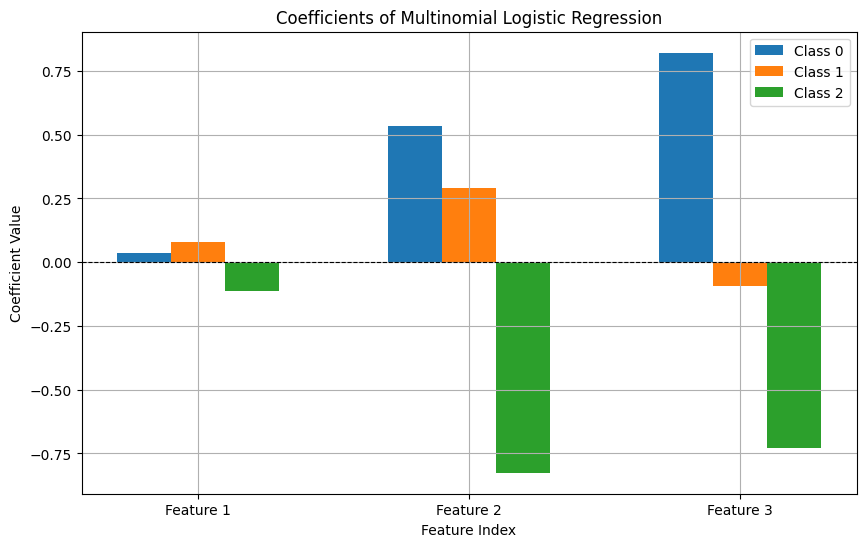

In [8]:
# 필요한 라이브러리 임포트
import numpy as np                # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 라이브러리
from sklearn.datasets import make_classification  # 데이터셋 생성을 위한 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.preprocessing import OneHotEncoder   # 원-핫 인코딩을 위한 라이브러리

# 1. 다중 클래스 분류용 데이터셋 생성
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0, n_classes=3, random_state=42)
# 200개의 샘플과 3개의 특성을 가진 3개 클래스를 가진 데이터셋 생성

# 2. 로지스틱 회귀 모델 학습 (다항 로지스틱 회귀)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # 다항 로지스틱 회귀 모델 객체 생성
model.fit(X, y)  # 모델을 학습 데이터(X, y)로 학습

# 3. 모델 계수 추출
coefficients = model.coef_  # 각 클래스에 대한 계수 추출
intercepts = model.intercept_ # 절편 추출

# 4. 계수 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
for i in range(coefficients.shape[0]):  # 각 클래스에 대해 반복
    plt.bar(np.arange(coefficients.shape[1]) + i * 0.2, coefficients[i], width=0.2, label=f'Class {i}') 
    # 클래스에 따른 계수를 막대 그래프로 표시

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 0 기준선 그리기
plt.title('Coefficients of Multinomial Logistic Regression')  # 그래프 제목
plt.xlabel('Feature Index')  # x축 레이블
plt.ylabel('Coefficient Value')  # y축 레이블
plt.xticks(np.arange(coefficients.shape[1]) + 0.2, ['Feature 1', 'Feature 2', 'Feature 3'])  # x축 눈금 설정
plt.legend()  # 범례 표시
plt.grid()  # 격자 표시
plt.show()  # 그래프 표시


## 4-3. 로지스틱 회귀 모델 최적화

로지스틱 회귀 모델의 최적화는 데이터의 클래스를 정확하게 예측할 수 있는 최적의 계수를 찾는 과정입니다. 이 과정은 최대우도추정법(Maximum Likelihood Estimation, MLE)을 사용하여 수행됩니다.

### 4-3-a. 최대우도함수

   - **우도(Likelihood)**: 주어진 데이터를 기반으로 특정 모델이나 가설이 얼마나 적합한지를 수치화한 것입니다. 이는 관찰된 데이터가 주어진 모델 하에서 발생할 확률을 나타냅니다.

   - **최대우도함수(Maximum Likelihood Function)**: 주어진 데이터를 가장 잘 설명할 수 있는 모델의 파라미터를 찾는 방법입니다. 즉, 관찰된 데이터가 발생할 확률을 최대화하는 파라미터를 추정합니다.

### 4-3-b. 로지스틱 회귀 모델의 최적화 과정

   1. **목표**: 로지스틱 회귀 모델의 목표는 시그모이드 함수의 계수를 조정하여 주어진 데이터의 클래스를 정확하게 예측하는 것입니다.

   2. **최대우도추정법(MLE)**: 
      - 로지스틱 회귀에서는 시그모이드 함수의 출력값이 각 데이터 포인트가 특정 클래스에 속할 확률로 해석됩니다.
      - MLE를 통해 이 확률을 최대화하는 방향으로 모델의 계수를 조정합니다.
      - 구체적으로, 로그 우도(Log-Likelihood)를 최대화하는 것이 일반적입니다. 로그 우도는 계산을 용이하게 하고 수렴 속도를 높이는 장점이 있습니다.

   3. **최적화 알고리즘**:
      - 경사하강법(Gradient Descent)이나 뉴턴 방법(Newton's Method)과 같은 최적화 알고리즘을 사용하여 반복적으로 파라미터를 업데이트합니다.
      - 이러한 알고리즘은 손실 함수(negative log-likelihood)를 최소화하는 방향으로 파라미터를 조정합니다.

로지스틱 회귀 모델의 최적화는 관찰된 데이터를 가장 잘 설명할 수 있는 파라미터를 찾는 과정입니다. 이를 통해 모델은 새로운 데이터에 대해 더 정확한 예측을 할 수 있게 됩니다. 최대우도추정법은 이러한 최적화를 수행하는 데 핵심적인 역할을 하며, 다양한 최적화 알고리즘과 함께 사용되어 효율적인 학습을 가능하게 합니다.

Log Loss: 0.2453


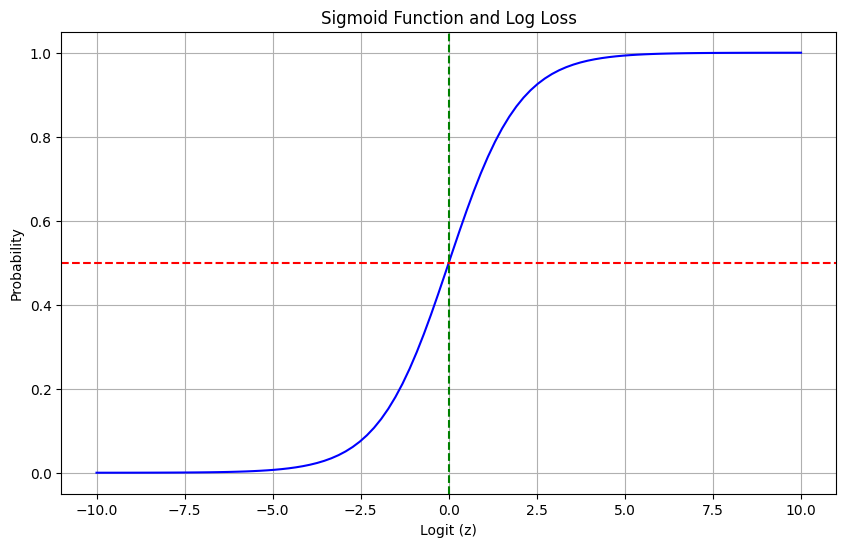

In [9]:
# 필요한 라이브러리 임포트
import numpy as np                # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 라이브러리
from sklearn.datasets import make_classification  # 데이터셋 생성을 위한 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import log_loss  # 로그 손실을 계산하기 위한 함수

# 1. 데이터셋 생성
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0, n_classes=2, random_state=42)
# 200개의 샘플과 3개의 특성을 가진 이진 분류 데이터셋 생성

# 2. 로지스틱 회귀 모델 학습
model = LogisticRegression()  # 로지스틱 회귀 모델 객체 생성
model.fit(X, y)              # 모델을 학습 데이터(X, y)로 학습

# 3. 모델의 예측 확률 계산
y_pred_prob = model.predict_proba(X)  # 각 클래스에 대한 예측 확률 계산
# y_pred_prob의 첫 번째 열은 클래스 0에 대한 확률, 두 번째 열은 클래스 1에 대한 확률입니다.

# 4. 로그 손실 계산
loss = log_loss(y, y_pred_prob)  # 로그 손실 계산
print(f'Log Loss: {loss:.4f}')  # 로그 손실 출력

# 5. 최적화 과정 시각화
# 시그모이드 함수 정의
def sigmoid(z):
    """
    시그모이드 함수 정의
    z: 입력값 (로짓)
    """
    return 1 / (1 + np.exp(-z))  # 시그모이드 함수 계산

# 로짓 값 생성
z = np.linspace(-10, 10, 100)  # -10부터 10까지의 범위를 가진 100개의 점 생성
probabilities = sigmoid(z)      # 시그모이드 함수 적용하여 확률 계산

# 결과 시각화
plt.figure(figsize=(10, 6))                       # 그래프 크기 설정
plt.plot(z, probabilities, color='blue')           # 시그모이드 곡선 그리기
plt.axhline(0.5, color='red', linestyle='--')     # 확률 0.5 기준선 그리기
plt.axvline(0, color='green', linestyle='--')     # 로짓 0 기준선 그리기
plt.title('Sigmoid Function and Log Loss')        # 그래프 제목
plt.xlabel('Logit (z)')                            # x축 레이블
plt.ylabel('Probability')                           # y축 레이블
plt.grid()                                         # 격자 표시
plt.show()                                         # 그래프 표시


## 4-4. 로지스틱 회귀 하이퍼파라미터

로지스틱 회귀 모델을 효과적으로 학습시키기 위해서는 다양한 하이퍼파라미터를 조정할 수 있습니다. 각 하이퍼파라미터는 모델의 성능과 학습 과정에 중요한 영향을 미칩니다.

- **solver**: 최적화 기법을 선택합니다. 각 기법은 다른 수렴 특성과 계산 효율성을 가지고 있습니다.
  - `lbfgs`: 디폴트 값으로, 작은 데이터셋에 적합한 알고리즘입니다.
  - `newton-cg`: 큰 데이터셋에 적합하며, 다항 로지스틱 회귀에 유리합니다.
  - `liblinear`: 작은 데이터셋이나 이진 분류 문제에 적합합니다.
  - `sag`: 대규모 데이터셋에 효율적인 확률적 경사하강법(Stochastic Average Gradient)입니다.
  - `saga`: sag의 개선된 버전으로, L1 규제를 지원합니다.

- **penalty**: 규제 방법을 지정합니다. 규제는 과적합을 방지하고 모델의 일반화 성능을 향상시킵니다.
  - `l1`: L1 규제를 사용하여 일부 계수를 0으로 만듭니다(특징 선택).
  - `l2`: 디폴트 값으로, L2 규제를 사용하여 계수를 작게 만듭니다(특징 축소).

- **C**: 규제 강도를 조절하는 파라미터입니다. 값이 높을수록 규제가 약해지고, 값이 낮을수록 규제가 강해집니다.

- **max_iter**: 최적화 알고리즘이 최적해를 찾기까지 허용되는 최대 반복 횟수입니다. 기본값은 100이며, 수렴하지 않을 경우 값을 증가시킬 수 있습니다.

- **multi_class**: 두 개 이상의 클래스를 분류할 때 사용하는 전략입니다.
  - `ovr` (one vs rest): 기본적인 방법으로, 각 클래스에 대해 이진 분류기를 학습시킵니다.
  - `multinomial`: 모든 클래스를 동시에 고려하여 다항 로지스틱 회귀를 수행합니다.
  - `auto`: 데이터와 solver에 따라 자동으로 전략을 선택합니다.

- **class_weight**: 예측 클래스가 불균형일 때 가중치를 부여하여 균형을 맞춥니다.
  - `None`: 디폴트 값으로, 모든 클래스에 동일한 가중치를 부여합니다.
  - `balanced`: 각 클래스의 빈도에 반비례하는 가중치를 자동으로 부여하여 균형을 맞춥니다.

이러한 하이퍼파라미터들은 로지스틱 회귀 모델의 성능과 학습 효율성을 조정하는 데 중요한 역할을 합니다. 데이터의 특성과 문제의 요구사항에 따라 적절한 값을 선택하는 것이 중요합니다.

In [10]:
# 필요한 라이브러리 임포트
import numpy as np                # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt   # 그래프를 그리기 위한 라이브러리
from sklearn.datasets import make_classification  # 데이터셋 생성을 위한 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.metrics import accuracy_score, classification_report  # 성능 평가를 위한 함수

# 1. 데이터셋 생성
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=0, n_classes=2, random_state=42)
# 200개의 샘플과 5개의 특성을 가진 이진 분류 데이터셋 생성

# 2. 데이터셋 분할 (훈련 데이터와 테스트 데이터로 나누기)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 70%는 훈련 데이터, 30%는 테스트 데이터로 나눕니다.

# 3. 로지스틱 회귀 모델 학습 (하이퍼파라미터 조정)
model = LogisticRegression(
    solver='lbfgs',               # 최적화 기법 선택 (디폴트 값)
    penalty='l2',                 # L2 규제 사용
    C=1.0,                        # 규제 강도 설정
    max_iter=200,                 # 최대 반복 횟수 설정
    multi_class='multinomial'     # 다항 로지스틱 회귀 사용
)

model.fit(X_train, y_train)      # 모델을 훈련 데이터(X_train, y_train)로 학습

# 4. 모델 예측
y_pred = model.predict(X_test)    # 테스트 데이터에 대한 예측 수행

# 5. 성능 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
report = classification_report(y_test, y_pred)  # 상세 성능 보고서 생성

print(f'Accuracy: {accuracy:.4f}')  # 정확도 출력
print('Classification Report:\n', report)  # 성능 보고서 출력


Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.93      0.96        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



/opt/anaconda3/envs/hana/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
# 필요한 라이브러리 임포트
import pandas as pd  # 데이터 처리를 위한 pandas 라이브러리
import numpy as np   # 수치 계산을 위한 numpy 라이브러리
from sklearn.model_selection import train_test_split  # 데이터셋을 학습 데이터와 테스트 데이터로 나누기 위한 함수
from sklearn.impute import SimpleImputer               # 결측치 처리를 위한 SimpleImputer
from sklearn.preprocessing import StandardScaler       # 데이터 표준화를 위한 StandardScaler
from sklearn.pipeline import make_pipeline              # 여러 데이터 전처리 단계를 연결하기 위한 파이프라인 생성
from sklearn.model_selection import GridSearchCV       # 하이퍼파라미터 튜닝과 교차 검증을 위한 GridSearchCV
from sklearn.linear_model import LogisticRegression     # 로지스틱 회귀 모델
from sklearn.metrics import classification_report        # 모델 성능을 평가하기 위한 classification_report
import plotly.express as px                            # 시각화를 위한 Plotly 라이브러리

# 1. 임의의 데이터셋 생성
from sklearn.datasets import make_classification
# make_classification 함수는 이진 분류 문제를 위한 데이터셋을 생성합니다.
# n_samples: 샘플의 수, n_features: 특성의 수, n_informative: 유용한 특성의 수,
# n_redundant: 중복된 특성의 수, n_classes: 분류할 클래스의 수를 지정합니다.
X, Y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=0, n_classes=2, random_state=42)
# 위의 설정으로 200개의 샘플과 5개의 특성을 가진 이진 분류 데이터셋을 생성합니다.

# 2. 데이터셋을 학습용과 테스트용으로 분할
# train_test_split 함수는 데이터를 학습 데이터와 테스트 데이터로 나누는 함수입니다.
# test_size=0.3: 전체 데이터의 30%를 테스트 데이터로 사용하고 나머지 70%는 학습 데이터로 사용합니다.
# random_state: 랜덤 상태를 고정하여 매번 동일한 결과를 얻도록 합니다.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 3. 파이프라인 생성
# 파이프라인을 사용하면 데이터 전처리 단계와 모델 학습 단계를 하나로 묶어서 관리할 수 있습니다.
model_pipe = make_pipeline(
    SimpleImputer(strategy='median'),  # 결측치를 중앙값으로 대체합니다.
    StandardScaler(),                  # 특성을 표준화하여 각 특성이 평균 0, 표준편차 1이 되도록 변환합니다.
    LogisticRegression()               # 로지스틱 회귀 모델을 포함합니다.
)

# 4. 하이퍼파라미터 튜닝을 위한 그리드 검색 설정
# 하이퍼파라미터는 모델 학습의 성능을 조정하는 매개변수입니다.
hp = {
    'logisticregression__solver': ['lbfgs', 'saga', 'newton-cg'],  # 사용할 최적화 알고리즘
    'logisticregression__C': [0.01, 0.1, 1, 1.5],                   # 규제 강도를 조정하는 C 값
    'logisticregression__class_weight': ['balanced']                 # 클래스 불균형 문제를 해결하기 위해 가중치를 자동으로 조정합니다.
}

# 5. GridSearchCV를 사용하여 하이퍼파라미터 튜닝 및 교차 검증
# GridSearchCV는 주어진 하이퍼파라미터 조합에 대해 모델을 학습하고 성능을 평가합니다.
# cv=4: 4겹 교차 검증을 통해 모델을 평가합니다.
# scoring='f1': F1 점수를 기준으로 최적의 하이퍼파라미터 조합을 선택합니다.
grid_model = GridSearchCV(model_pipe, param_grid=hp, cv=4, scoring='f1', n_jobs=-1)

# 6. 모델 학습
# fit 메서드를 사용하여 학습 데이터로 모델을 학습합니다.
grid_model.fit(x_train, y_train)

# 7. 최적 모델 선택
# best_estimator_ 속성을 사용하여 하이퍼파라미터 튜닝을 통해 선택된 최적의 모델을 가져옵니다.
best_model = grid_model.best_estimator_
print("최적의 모델:", best_model)

# 8. 평가: 학습 데이터와 테스트 데이터에 대해 예측 수행
y_train_pred = best_model.predict(x_train)   # 학습 데이터에 대한 예측
y_test_pred = best_model.predict(x_test)     # 테스트 데이터에 대한 예측

# 9. 성능 평가 출력
# classification_report 함수를 사용하여 모델의 성능을 평가합니다.
# 여기서는 정밀도(precision), 재현율(recall), F1 점수 등을 제공합니다.
print('학습 성능 : ', classification_report(y_train, y_train_pred))  # 학습 데이터에 대한 성능 보고서 출력
print('일반화 성능 : ', classification_report(y_test, y_test_pred))  # 테스트 데이터에 대한 성능 보고서 출력

# 10. 회귀 계수 추출 및 데이터프레임 생성
# 최적 모델에서 회귀 계수를 추출하여 데이터프레임으로 만듭니다.
df_coef = pd.DataFrame()                              # 빈 데이터프레임 생성
df_coef['Coef'] = best_model.named_steps['logisticregression'].coef_[0]  # 회귀 계수를 가져옵니다.
df_coef['Feature'] = [f'Feature {i+1}' for i in range(X.shape[1])]  # 특성 이름 생성 (Feature 1, Feature 2 등)

# 11. 회귀 계수 설명
# 로지스틱 회귀의 경우, 각 계수는 해당 특성이 종속 변수 Y에 미치는 영향을 나타냅니다.
# 계수가 양수인 경우, 해당 X의 증가는 Y에 속할 확률이 증가함을 의미합니다.
# 계수가 음수인 경우, 해당 X의 증가는 Y에 속하지 않을 확률이 증가함을 의미합니다.

# 12. 회귀 계수 시각화
# Plotly를 사용하여 회귀 계수를 시각적으로 표현합니다.
fig = px.bar(df_coef, x='Feature', y='Coef', title='Logistic Regression Coefficients')
fig.show()


최적의 모델: Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.5, class_weight='balanced'))])
학습 성능 :                precision    recall  f1-score   support

           0       0.92      0.94      0.93        70
           1       0.94      0.91      0.93        70

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

일반화 성능 :                precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.86      0.93        29

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

